<a href="https://colab.research.google.com/github/Neoneto/10-Week-10-Dimensionality-Reduction/blob/main/PCA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCA Exercise
Submitted by Kenneth Alaba

In [33]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [4]:
# load the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# view the shape of the dataset
mnist.data.shape

(70000, 784)

In [5]:
# Save the data as a pandas dataframe, easier to work with
df = pd.DataFrame(data= mnist.data, columns=mnist.feature_names)
df['class'] = mnist.target
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [7]:
# Show the first row as an image
sample = df.to_numpy()[0][:-1].reshape(28, 28).astype(np.float32)

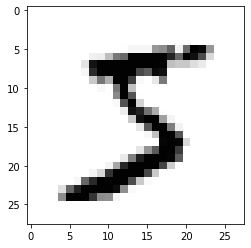

In [8]:
plt.imshow(sample, cmap = 'Greys')

In [9]:
# Check the df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: category(1), float64(784)
memory usage: 418.8 MB


No missing values, target column has dtype of object and the rest are all numerical. No further cleaning and pre-processing needed

In [10]:
# Define targets and features
X = df.drop( columns = 'class')
y = df[['class']]

In [11]:
# Take the correlation of columns in the features
corr = X.corr()

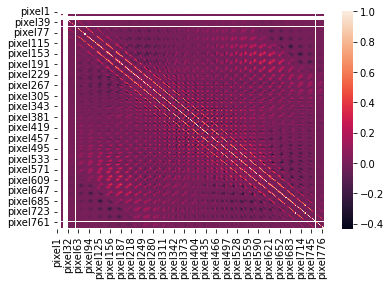

In [13]:
# Display the correlation as a heatmap
sns.heatmap(corr,)

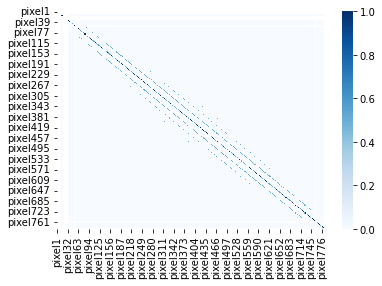

In [45]:
# display columns with strong correlation (above 0.5)
strongs = np.floor(abs(corr)*2)/2

sns.heatmap(strongs, cmap ='Blues')


This shows that a pixel has strong correlation with the other pixels sorrounding it allowing us to greatly reduce the number of dimensions.

In [22]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)

In [23]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

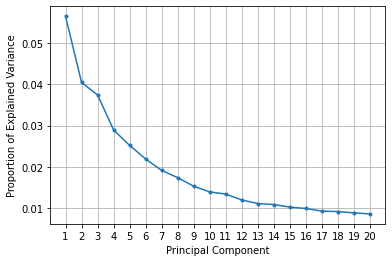

In [30]:
# Plot the explained variance ratios of the first 10 principal components
max = 20
plt.plot(range(1, max+1), pca.explained_variance_ratio_[:max], marker = '.')
plt.xticks(ticks = range(1, max+1))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.grid()

The scree plot doesn't have an obvious elbow point, but at 15 Principal components, the proportion is already at 1%, making it a good starting point for the number of PC to keep.

## Applying PCA before training a model

In [31]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [32]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [41]:
# fit PCA
pca = PCA(n_components = 15)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
# fit Decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train_pca, y_train)

DecisionTreeClassifier()

In [42]:
# Evaluate the model
print('Training accuracy:', model.score(X_train_pca, y_train))
print('Testing accuracy:', model.score(X_test_pca, y_test))

Training accuracy: 1.0
Testing accuracy: 0.8342285714285714


In [47]:
# Using the same model but the original, unreduced, dataset
model0 = DecisionTreeClassifier()
model0.fit(X_train_sc, y_train)

DecisionTreeClassifier()

In [49]:
# Evaluate the model
print('Training accuracy:', model0.score(X_train_sc, y_train))
print('Testing accuracy:', model0.score(X_test_sc, y_test))

Training accuracy: 1.0
Testing accuracy: 0.8725142857142857


Compared to the original set, the new dataset with reduced dimensionality produced a test accuracy that is lower by 4% but is completed faster.